In [9]:
from sklearn.datasets import load_iris

In [10]:
df = load_iris()

In [11]:
print("Properties of iris keys",df.keys())

Properties of iris keys dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
df.filename

'/Users/bikashpokharel/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/data/iris.csv'

In [14]:
df.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
# we are predicting class species for a new values using the measurements that we have

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, random_state=0)

In [18]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [19]:
import pandas as pd
X_train_dataframe  = pd.DataFrame(X_train, columns = df.feature_names)

In [20]:
X_train_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


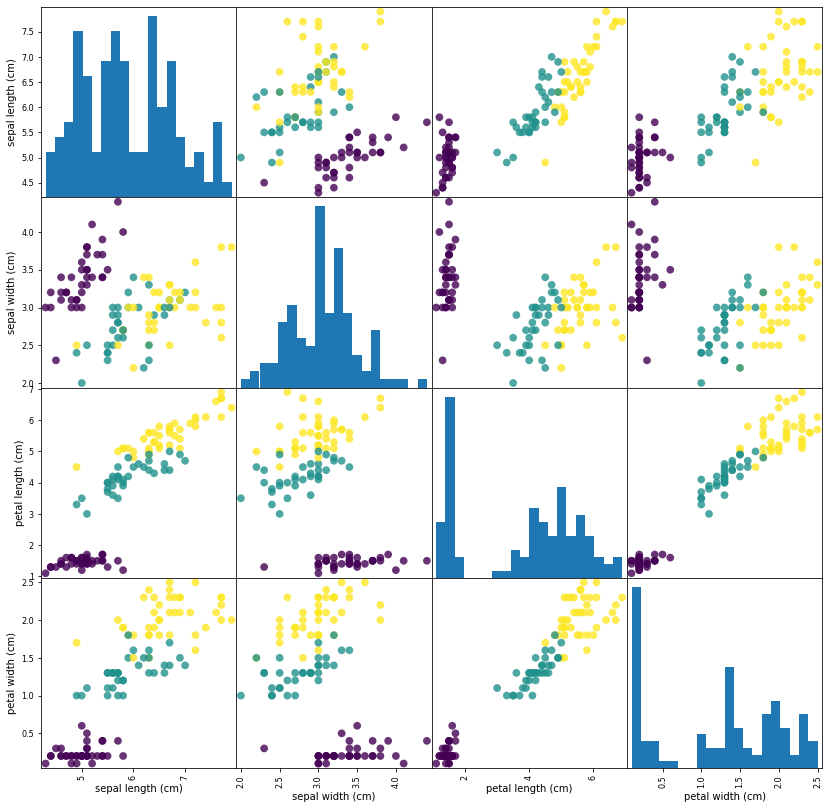

In [21]:
# looking at the data first
import matplotlib.pyplot as plt
scp = pd.plotting.scatter_matrix(X_train_dataframe, c = y_train, figsize = (14,14), marker = '0', hist_kwds={'bins':20}, s = 60, alpha = .8)


In [22]:
# plots are clustered in a good way so we're accepting the dataset for K-Nearest Neighbours

In [23]:
# starting from KNN since this is the easiest model for starter

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =1)

In [25]:
#knn encapsulates the algorithm that will be used to build the model from the training data.

In [27]:
# to build the model on traininig dataset we called fit method
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
import numpy as np
X_wild = np.array([[5,2.9,1,0.2]])

In [38]:
X_wild

array([[5. , 2.9, 1. , 0.2]])

In [40]:
prediction_wild = knn.predict(X_wild)

In [43]:
print("Prediction: {}".format(prediction_wild))

Prediction: [0]


In [44]:
# since we found that the irish that we found on wild belongs t 0 class. now the mystery is what is actally this 0 class.
# Is it Setosa or Virginia or what. You're a data scientist so no assumption please. 
print("prediction:{}".format(df['target_names'][prediction_wild]))


prediction:['setosa']


In [49]:
# We've predict using the testing data only so we don't know whether the prediction is correct or not

In [50]:
# This is the whole point of building the model and splitting the model for testing data
# We know the class of testing data based on the value we have on dataset so we can use this data to test the accuracy of our model.
# This is how we test the accuracy of our model.

In [51]:
# We can measure how well the model works by computing the accuracy, which is the fraction of flowers for which 
# the right species was predicted

In [52]:
# Now lets predict using our testing datset
y_pred = knn.predict(X_test)

In [53]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [54]:
# to compute test accuracy we use this function

In [55]:
print("Test set score is: {}".format(knn.score(X_test, y_test)))

Test set score is: 0.9736842105263158


In [56]:
#CRAZYYY
# We got 0.97% accuracy which conclude it is a very good model